# Beer suggestions model

## Information 

### Dataset
A dataset of up to 50 top-rated beers across 112 styles, 5558 beers in total. Source: BeerAdvocate.com. 

### Data

<b> ABV: </b> Alcohol by volume (amount of % is alcohol)

<b> IBU: </b> International bitterness units

| IBU / EBU | Bitterness |
| --- | --- |
|5 - 20 | Not very bitter |
|20 - 30 | Lightly bitter |
|30 - 45 | Bitter |
|> 45 | Very bitter |

<b> Ave Rating: </b> Average rating


## Imports

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Get data

In [161]:
Dataset = r'data/beer_data_set.csv'
columns_to_load = ["Name", "Style", "Style Key", "Brewery", "Description", "ABV", "Ave Rating", "Min IBU", "Max IBU", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]
df = pd.read_csv(Dataset, usecols=columns_to_load)
df.head()

,Name,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,Double Bag,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,Scurry,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218


## Visualize the data

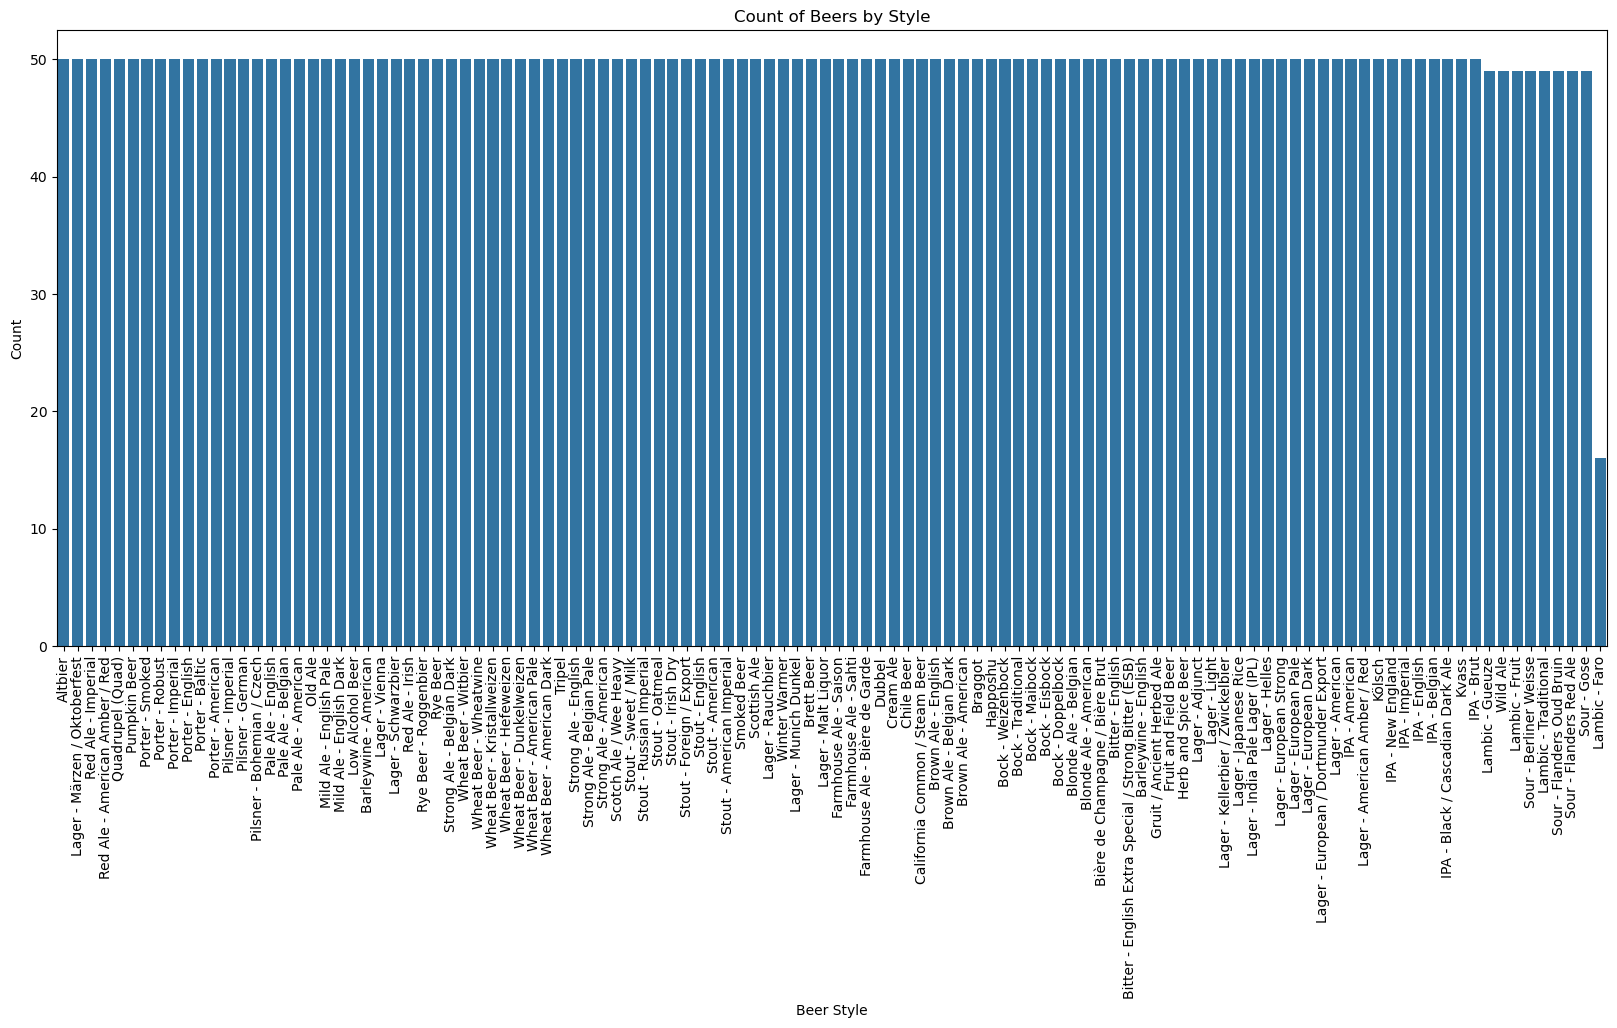

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

style_counts = df['Style'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=style_counts.index, y=style_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.title('Count of Beers by Style')
plt.show()

## Prepare the data for machine learning algorithms

In [163]:
df['IBU'] = (df['Min IBU'] + df['Max IBU']) / 2
df = df.drop(['Min IBU', 'Max IBU'], axis=1)
df = df.dropna()

label_encoder = LabelEncoder()
df['Style'] = label_encoder.fit_transform(df['Style'])

## Finalize the data

In [164]:
#select the target
y = df['Style']

#select what you give as input
X = df[["Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select a model and train it

Accuracy: 0.32643884892086333


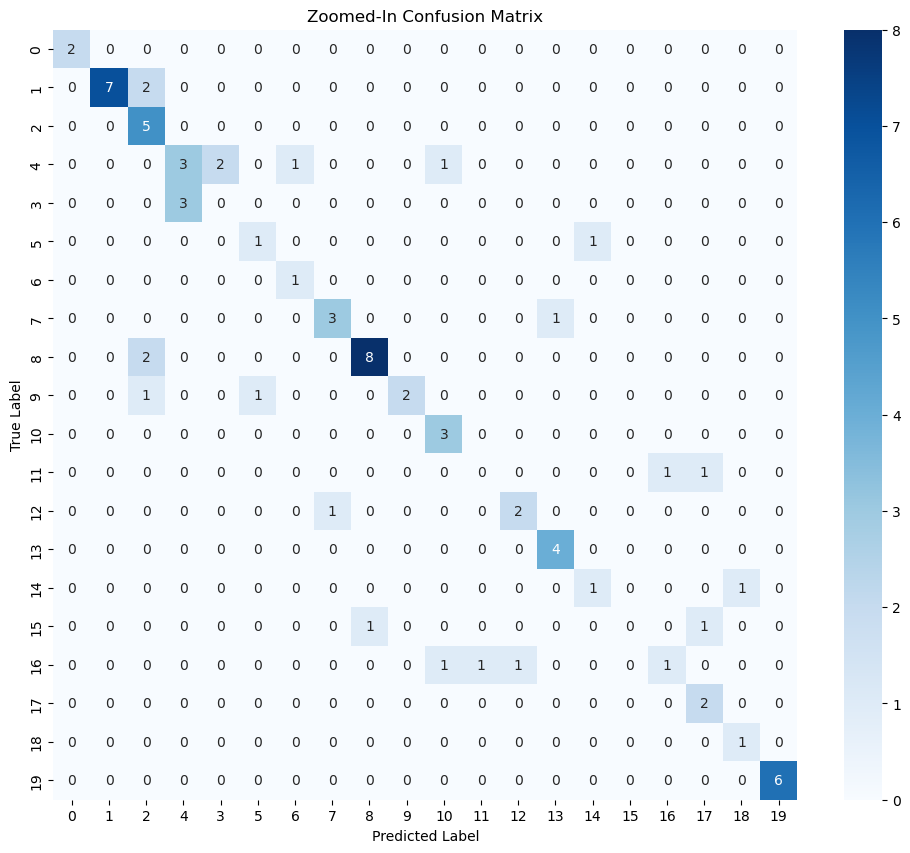

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define a range of indices to zoom into (e.g., first 20 classes)
start_index = 0
end_index = 20

# Slice the confusion matrix to zoom in
conf_matrix_zoomed = conf_matrix[start_index:end_index, start_index:end_index]

# Plot heatmap for zoomed-in matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_zoomed, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['Style'].unique()[start_index:end_index], 
            yticklabels=df['Style'].unique()[start_index:end_index])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Zoomed-In Confusion Matrix')
plt.show()